In [164]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [104]:
#get dataset
import os
import pathlib

'''
# Dataset URL (working link)
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
# Download and extract the file
archive = tf.keras.utils.get_file(origin=dataset_url, extract = True)
# Extracted folder will be next to the downloaded .tgz
data_dir = pathlib.Path(os.path.join(os.path.dirname(archive), 'flower_photos'))
'''

# if the dataset exist in the system
data_dir = pathlib.Path(os.path.expanduser("~/.keras/datasets/flower_photos"))
data_dir


WindowsPath('C:/Users/AsusIran/.keras/datasets/flower_photos')

In [116]:
batch_size = 32
img_height = 180
img_width = 180

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    seed=123,
    batch_size=batch_size,
    shuffle=True
)

Found 3670 files belonging to 5 classes.


In [172]:
class_names = dataset.class_names

In [117]:
ds_size = tf.data.experimental.cardinality(dataset).numpy()

train_size = int(0.7 * ds_size)
val_size = int(0.15 * ds_size)
test_size = ds_size - train_size - val_size

print(train_size, val_size, test_size)

X_train = dataset.take(train_size)
X_val = dataset.skip(train_size).take(val_size)
X_test = dataset.skip(train_size + val_size).take(test_size)

80 17 18


In [ ]:
# X_train = tf.keras.utils.image_dataset_from_directory(
#     data_dir,
#     validation_split=0.2,
#     subset="training",
#     seed=123,
#     image_size = (img_height, img_width)
# )

# X_test = tf.keras.utils.image_dataset_from_directory(
#     data_dir,
#     validation_split = 0.2,
#     subset="validation",
#     seed=123,
#     image_size=(img_height, img_width)
# )

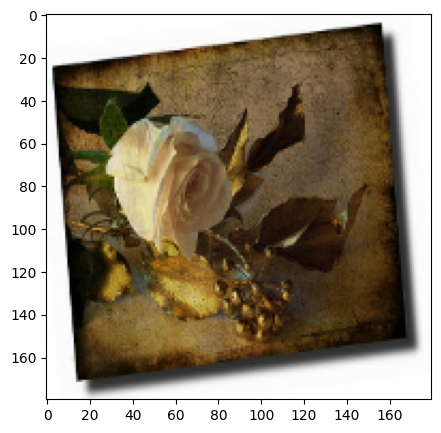

In [118]:
plt.figure(figsize=(5,5))
for image, label in X_train.take(1):
    img = image[0].numpy().astype("uint8")
    plt.imshow(img)

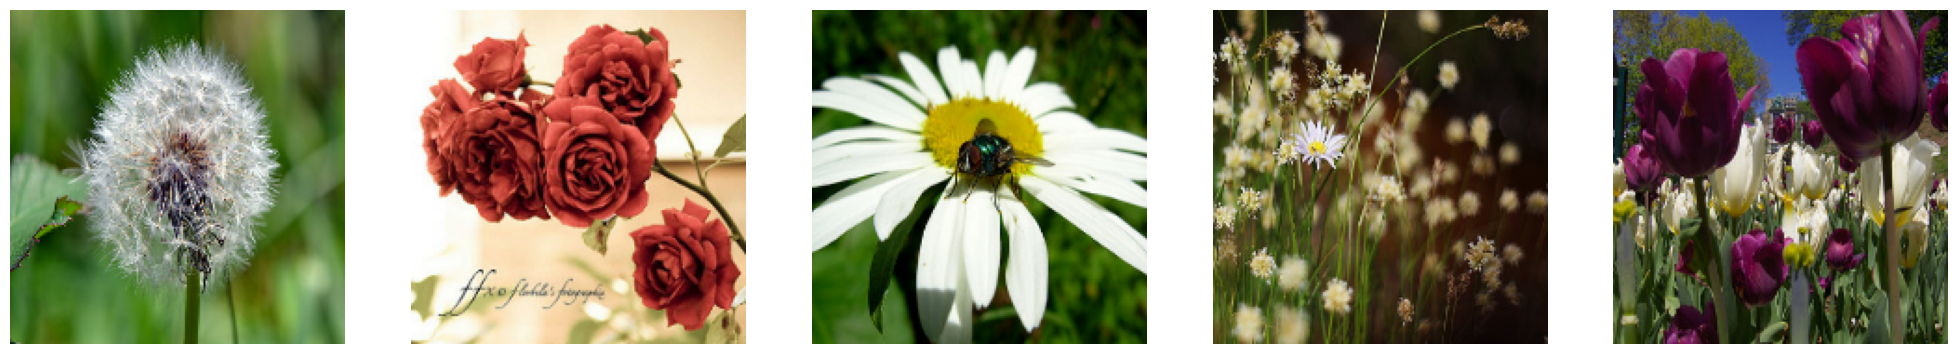

In [119]:
import random


fig, ax = plt.subplots(nrows = 1, ncols = 5, figsize = (25, 5))

for i in range(5):
    random_index = random.randint(0, len(X_train)) # create a random num to use as an index
    for image, label in X_train.take(4):
        ax[i].imshow(image[i].numpy().astype("uint8"))
        ax[i].axis('off')
    
plt.show()

In [120]:
for image, label in X_train.take(1):
    img = image[0].numpy().astype("uint8")
    print(img.shape)

(180, 180, 3)


In [121]:
model = keras.Sequential()

model.add(keras.layers.Dense(32, activation='relu', input_shape=(img_height,img_width,3)))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Conv2D(filters=32, kernel_size=(3,3), strides=(1,1)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Activation('relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(5, activation='softmax'))

model.summary()

f:\Python\FastAPI\fastAPI_env\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_37 (Dense)                │ (None, 180, 180, 32)   │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 178, 178, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_14          │ (None, 178, 178, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_14 (Activation)      │ (None, 178, 178, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_38 (Dense)                │ (None, 89, 89, 64)     │         2,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 87, 87, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_15          │ (None, 87, 87, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_15 (Activation)      │ (None, 87, 87, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 43, 43, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_39 (Dense)                │ (None, 43, 43, 128)    │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 41, 41, 32)     │        36,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_16          │ (None, 41, 41, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 41, 41, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_15 (MaxPooling2D) │ (None, 20, 20, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_5 (Flatten)             │ (None, 12800)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_40 (Dense)                │ (None, 64)             │       819,264 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_41 (Dense)                │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_42 (Dense)                │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_43 (Dense)                │ (None, 5)              │         1,285 │
└─────────────────────────────────┴────────────────────────┴─────────────

 Total params: 933,349 (3.56 MB)

 Trainable params: 933,157 (3.56 MB)

 Non-trainable params: 192 (768.00 B)

In [122]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

call_back = keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=15)
history = model.fit(X_train, batch_size=64, epochs=20, callbacks=call_back, validation_data=X_val)


Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 56s 664ms/step - accuracy: 0.2272 - loss: 1.9627 - val_accuracy: 0.2298 - val_loss: 1.6027
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 53s 666ms/step - accuracy: 0.2637 - loss: 1.5980 - val_accuracy: 0.2426 - val_loss: 1.5952
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 55s 692ms/step - accuracy: 0.2554 - loss: 1.5977 - val_accuracy: 0.2335 - val_loss: 1.6025
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 54s 671ms/step - accuracy: 0.2588 - loss: 1.5978 - val_accuracy: 0.2298 - val_loss: 1.6031
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 53s 661ms/step - accuracy: 0.2523 - loss: 1.5956 - val_accuracy: 0.2353 - val_loss: 1.6060
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 51s 641ms/step - accuracy: 0.2643 - loss: 1.5917 - val_accuracy: 0.2482 - val_loss: 1.6029
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 52s 650ms/step - accuracy: 0.2648 - loss: 1.5926 - val_accuracy: 0.2408 - val_loss: 1.6055
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 51s 642ms/step - accuracy: 0.2571 - loss: 1.5931 - val_accu

In [158]:
y_pred_val = model.predict(X_val)

17/17 ━━━━━━━━━━━━━━━━━━━━ 3s 147ms/step


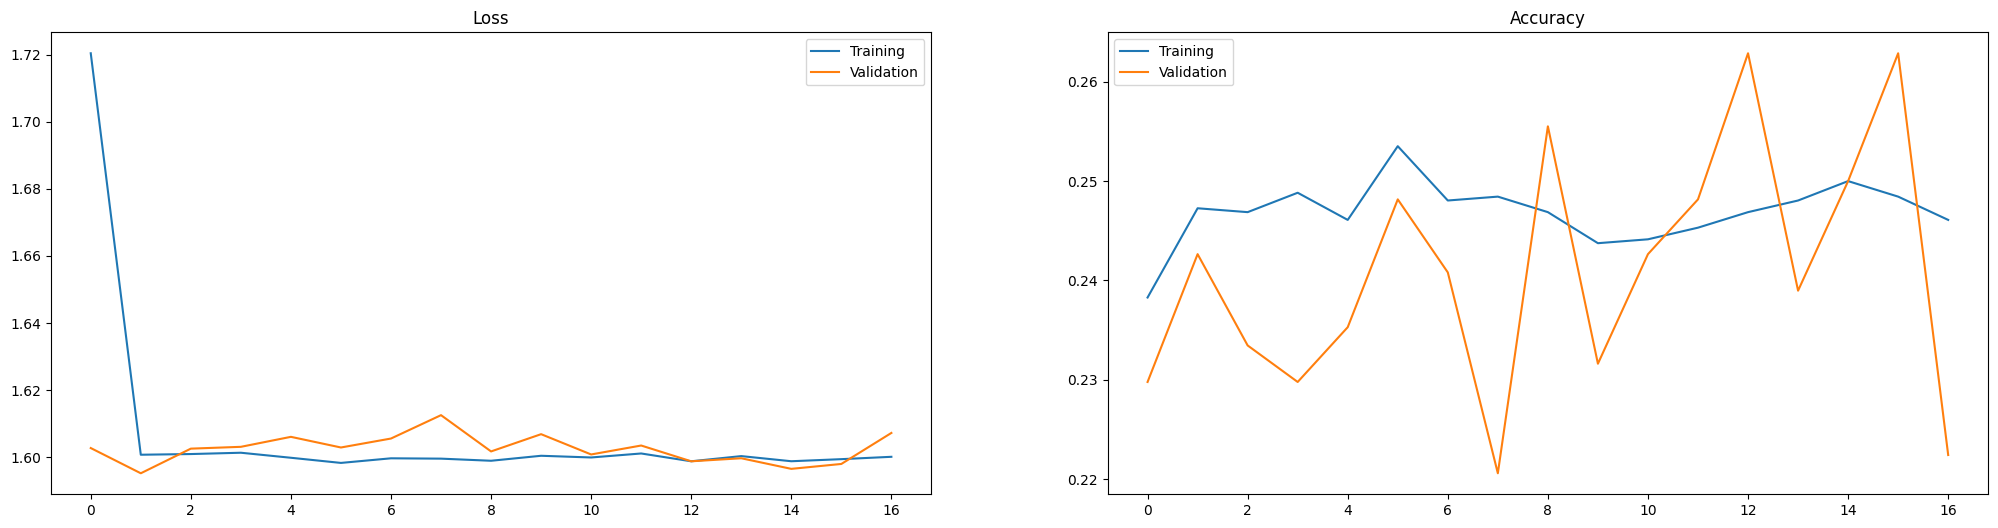

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25, 6))
ax[0].plot(history.history['loss'], label='Training')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Training')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Accuracy')
ax[1].legend()

plt.show()

In [160]:
y_true = np.concatenate([y for x, y in X_val], axis=0)
y_pred_classes = np.argmax(y_pred_val, axis=1)

cf = confusion_matrix(y_true, y_pred_classes)

<Axes: >

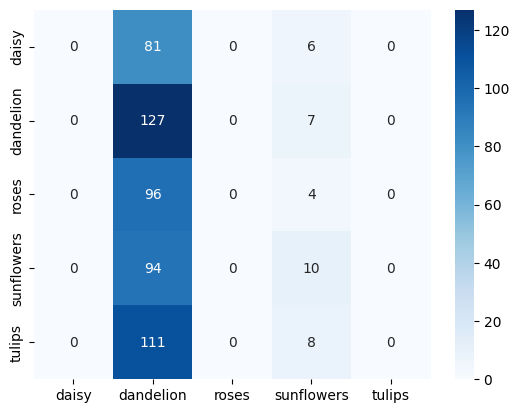

In [173]:
sns.heatmap(cf, cmap='Blues', annot=True, fmt='d', xticklabels=class_names, yticklabels=class_names)

### Add learning_rate = 0.001

In [ ]:
model = keras.Sequential()

# 1st layer
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), input_shape = (img_height, img_width, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

# 2nd layer
model.add(keras.layers.Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

# 3rd layer
model.add(keras.layers.Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu'))
model.add(keras.layers.MaxPooling2D(pool_size = (2, 2)))

# Flatten layer
model.add(keras.layers.Flatten())

# Dense layer
model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

# output layer
model.add(keras.layers.Dense(5, activation = 'softmax'))

model.summary()

f:\Python\FastAPI\fastAPI_env\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)              │ (None, 178, 178, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_16 (MaxPooling2D) │ (None, 89, 89, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 87, 87, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_17 (MaxPooling2D) │ (None, 43, 43, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 41, 41, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_18 (MaxPooling2D) │ (None, 20, 20, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 51200)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_44 (Dense)                │ (None, 64)             │     3,276,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 5)              │           325 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,370,437 (12.86 MB)

 Trainable params: 3,370,437 (12.86 MB)

 Non-trainable params: 0 (0.00 B)

In [191]:
adam = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(optimizer = adam, loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [192]:
call_back = keras.callbacks.EarlyStopping(monitor='val_loss', restore_best_weights=True, patience=15)
history = model.fit(X_train, batch_size=32, epochs=20, callbacks=call_back, validation_data=X_val)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 243ms/step - accuracy: 0.2583 - loss: 1.5938 - val_accuracy: 0.2206 - val_loss: 1.6069
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 243ms/step - accuracy: 0.2484 - loss: 1.5974 - val_accuracy: 0.2279 - val_loss: 1.6037
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 256ms/step - accuracy: 0.2627 - loss: 1.5929 - val_accuracy: 0.2279 - val_loss: 1.6085
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 242ms/step - accuracy: 0.2620 - loss: 1.5944 - val_accuracy: 0.2426 - val_loss: 1.5995
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 19s 237ms/step - accuracy: 0.2640 - loss: 1.5931 - val_accuracy: 0.2371 - val_loss: 1.6029
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 245ms/step - accuracy: 0.2621 - loss: 1.5920 - val_accuracy: 0.2279 - val_loss: 1.6050
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 20s 254ms/step - accuracy: 0.2535 - loss: 1.5962 - val_accuracy: 0.2408 - val_loss: 1.6027
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 21s 258ms/step - accuracy: 0.2605 - loss: 1.5927 - val_accu

In [194]:
y_pred_val = model.predict(X_val)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step


In [195]:
model.evaluate(X_val)

17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - accuracy: 0.2506 - loss: 1.6053


[1.6059802770614624, 0.23345588147640228]

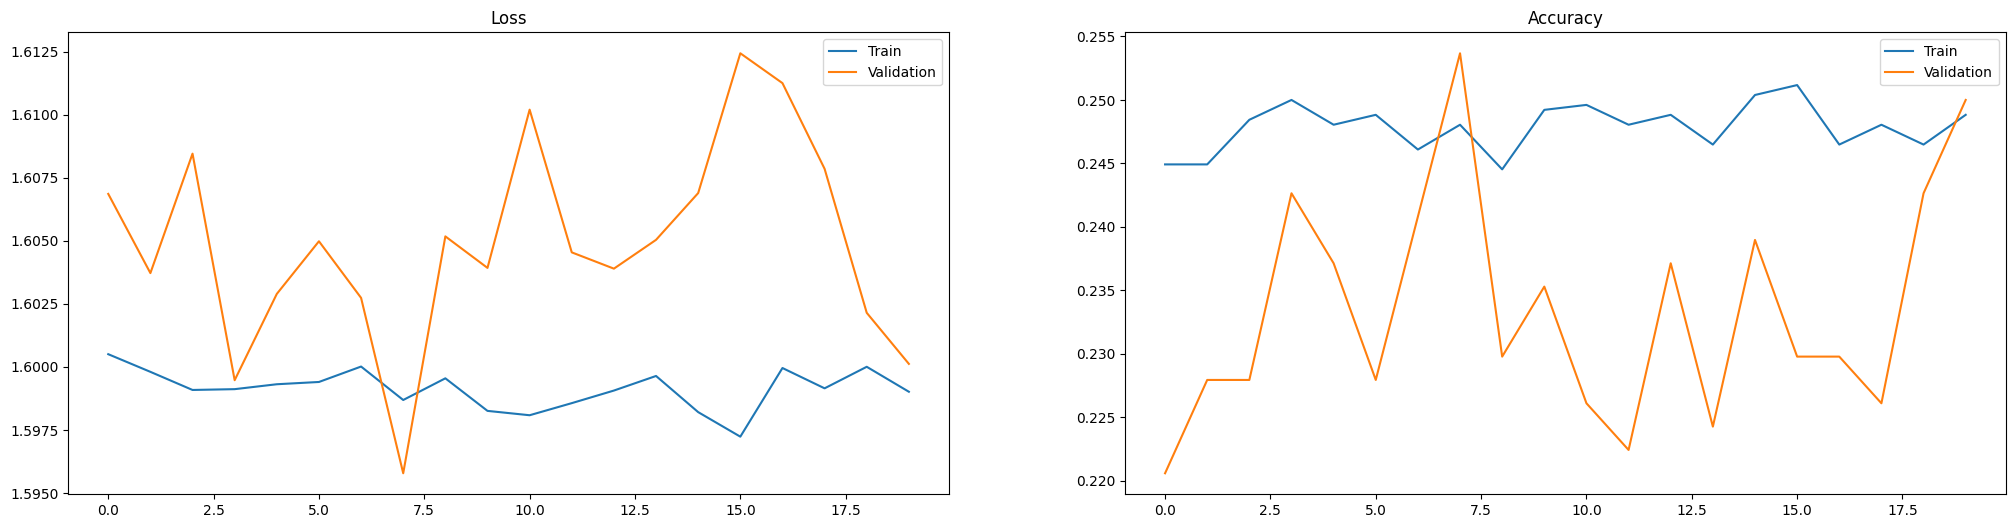

In [197]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(25,6))
ax[0].plot(history.history['loss'], label='Train')
ax[0].plot(history.history['val_loss'], label='Validation')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(history.history['accuracy'], label='Train')
ax[1].plot(history.history['val_accuracy'], label='Validation')
ax[1].set_title('Accuracy')
ax[1].legend()

plt.show()

In [203]:
y_true = np.concatenate([y for x, y in X_val], axis=0)
y_pred_classes = np.argmax(y_pred_val, axis=1)


In [204]:
cf = confusion_matrix(y_true, y_pred_classes)

<Axes: >

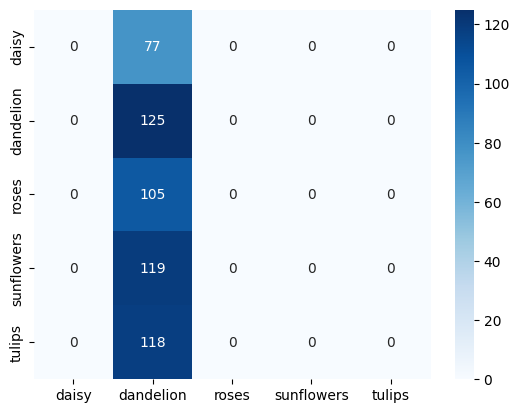

In [205]:
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)

### AlexNet Architecture:

5 convolutional layers

3 fully connected layers

ReLU activations

MaxPooling

Dropout

In [ ]:

def build_alexnet(input_shape=(224, 224, 3), num_classes=5):  # Adjust num_classes for your dataset
    model = keras.Sequential()

    # Layer 1
    model.add(keras.layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Layer 2
    model.add(keras.layers.Conv2D(256, (5, 5), padding='same', activation='relu'))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Layer 3
    model.add(keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Layer 4
    model.add(keras.layers.Conv2D(384, (3, 3), padding='same', activation='relu'))

    # Layer 5
    model.add(keras.layers.Conv2D(256, (3, 3), padding='same', activation='relu'))
    model.add(keras.layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))

    # Flatten
    model.add(keras.layers.Flatten())

    # FC layers
    model.add(keras.layers.Dense(4096, activation='relu'))
    model.add(keras.layers.Dropout(0.5))
    model.add(keras.layers.Dense(4096, activation='relu'))
    model.add(keras.layers.Dropout(0.5))

    # Output
    model.add(keras.layers.Dense(num_classes, activation='softmax'))

    return model


### Using Transfer Learning (ResNet)

In [212]:
from tensorflow.keras.applications import ResNet50

In [226]:
# Load the base model (exclude original classifier head)
base_model = ResNet50(include_top=False, weights='imagenet', input_shape=(img_height, img_width, 3))

# Freeze the base model (for now)
base_model.trainable=False

In [ ]:
model = keras.Sequential()
model.add(base_model)

# model.add(keras.layers.Flatten())
model.add(keras.layers.GlobalAveragePooling2D())

model.add(keras.layers.Dense(96, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(96, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(96, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(5, activation='softmax'))


In [229]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_resNet= model.fit(X_train, epochs=20, batch_size=64, validation_data=X_val)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 57s 651ms/step - accuracy: 0.9160 - loss: 0.2344 - val_accuracy: 0.8989 - val_loss: 0.3137
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 52s 646ms/step - accuracy: 0.9272 - loss: 0.2098 - val_accuracy: 0.8971 - val_loss: 0.3225
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 52s 645ms/step - accuracy: 0.9539 - loss: 0.1443 - val_accuracy: 0.8989 - val_loss: 0.3444
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 52s 648ms/step - accuracy: 0.9595 - loss: 0.1226 - val_accuracy: 0.9044 - val_loss: 0.3428
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 52s 645ms/step - accuracy: 0.9515 - loss: 0.1459 - val_accuracy: 0.9228 - val_loss: 0.2329
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 53s 659ms/step - accuracy: 0.9607 - loss: 0.1052 - val_accuracy: 0.9099 - val_loss: 0.3453
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 52s 654ms/step - accuracy: 0.9561 - loss: 0.1201 - val_accuracy: 0.8971 - val_loss: 0.3075
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 52s 648ms/step - accuracy: 0.9682 - loss: 0.0977 - val_accu

In [230]:
y_pred_val = model.predict(X_val)

17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 500ms/step


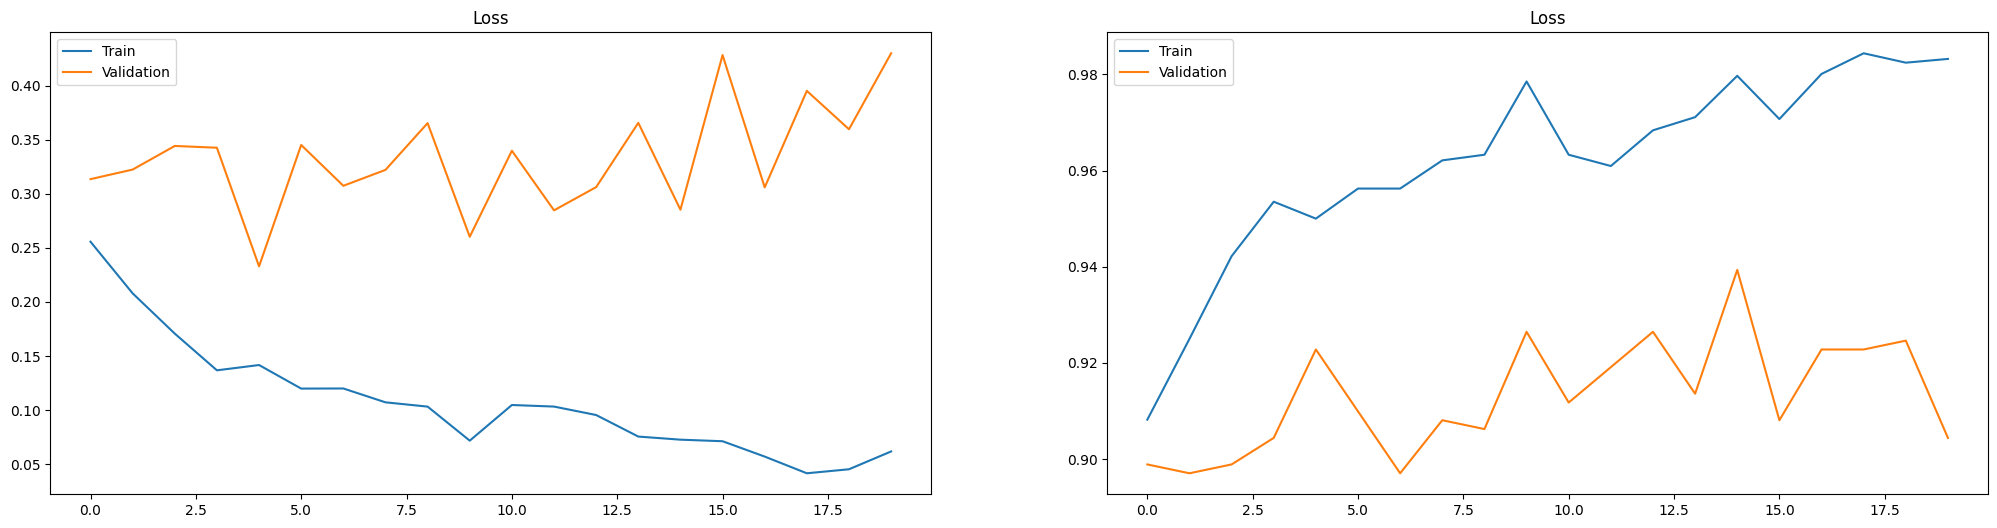

In [232]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(25,6))

ax[0].plot(history_resNet.history['loss'], label='Train')
ax[0].plot(history_resNet.history['val_loss'], label='Validation')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(history_resNet.history['accuracy'], label='Train')
ax[1].plot(history_resNet.history['val_accuracy'], label='Validation')
ax[1].set_title('Loss')
ax[1].legend()

plt.show()

### Change FC layer

In [235]:
model = keras.Sequential()
model.add(base_model)

# model.add(keras.layers.Flatten())
model.add(keras.layers.GlobalAveragePooling2D())

model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(5, activation='softmax'))


In [236]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_resNet= model.fit(X_train, epochs=20, batch_size=64, validation_data=X_val)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 59s 694ms/step - accuracy: 0.6075 - loss: 1.2896 - val_accuracy: 0.8419 - val_loss: 0.4369
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 83s 1s/step - accuracy: 0.8076 - loss: 0.4968 - val_accuracy: 0.8603 - val_loss: 0.3727
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 80s 1s/step - accuracy: 0.8661 - loss: 0.3698 - val_accuracy: 0.8640 - val_loss: 0.3690
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 78s 972ms/step - accuracy: 0.8839 - loss: 0.3189 - val_accuracy: 0.8787 - val_loss: 0.3162
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 79s 990ms/step - accuracy: 0.9171 - loss: 0.2336 - val_accuracy: 0.9044 - val_loss: 0.2710
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 78s 980ms/step - accuracy: 0.9132 - loss: 0.2341 - val_accuracy: 0.9099 - val_loss: 0.2535
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 78s 978ms/step - accuracy: 0.9340 - loss: 0.1877 - val_accuracy: 0.9136 - val_loss: 0.2655
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 78s 976ms/step - accuracy: 0.9430 - loss: 0.1636 - val_accuracy: 

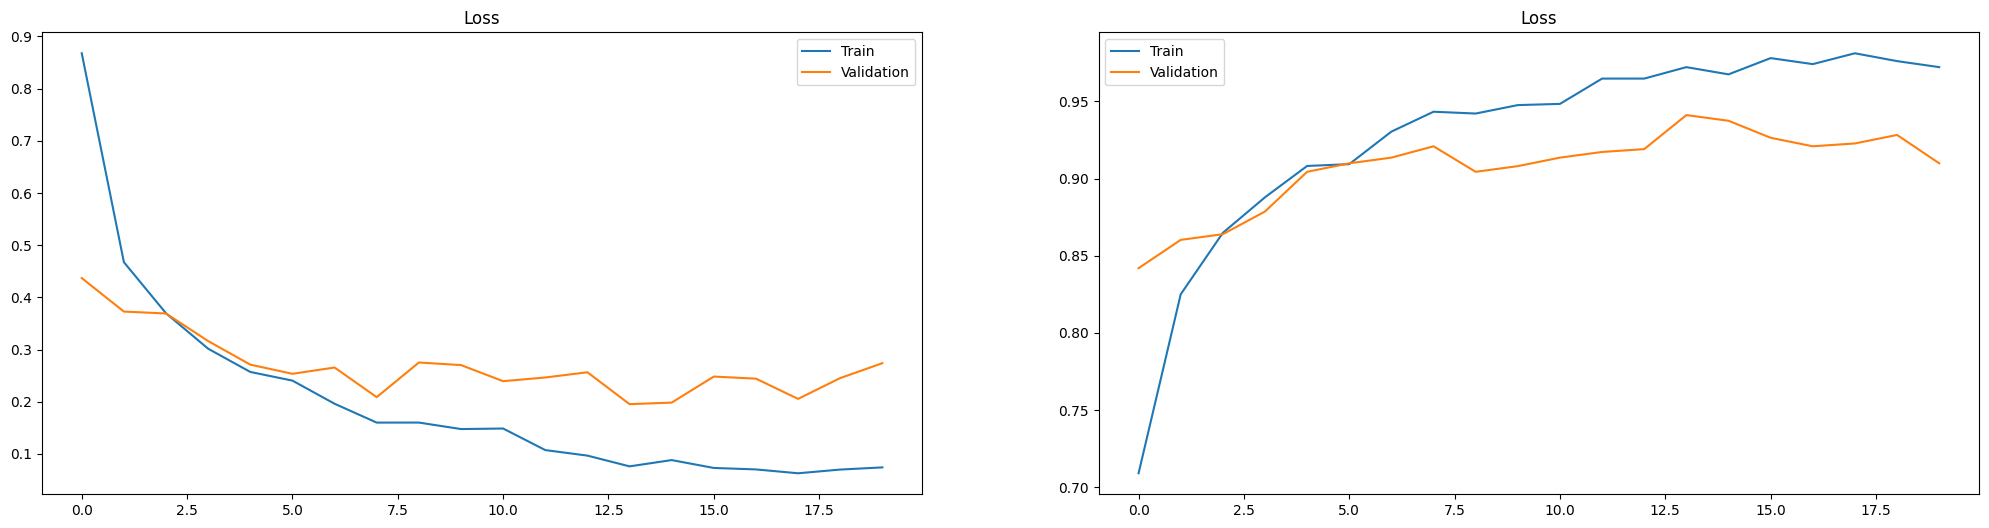

In [237]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(25,6))

ax[0].plot(history_resNet.history['loss'], label='Train')
ax[0].plot(history_resNet.history['val_loss'], label='Validation')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(history_resNet.history['accuracy'], label='Train')
ax[1].plot(history_resNet.history['val_accuracy'], label='Validation')
ax[1].set_title('Loss')
ax[1].legend()

plt.show()

<Axes: >

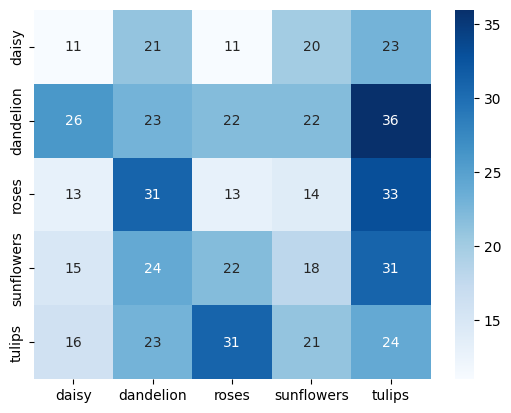

In [238]:
y_true = np.concatenate([y for x,y in X_val], axis = 0)
y_pred_classes = np.argmax(y_pred_val, axis = 1)

cf = confusion_matrix(y_true, y_pred_classes)
sns.heatmap(cf, cmap='Blues', fmt='d', annot=True, xticklabels=class_names, yticklabels=class_names)

### Fine-tune

In [241]:
base_model.trainable = True
optimizer = tf.keras.optimizers.Adam(1e-5)

model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_resNet_finetune= model.fit(X_train, epochs=20, batch_size=64, validation_data=X_val)

Epoch 1/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 222s 3s/step - accuracy: 0.7876 - loss: 0.8937 - val_accuracy: 0.9044 - val_loss: 0.3040
Epoch 2/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 196s 2s/step - accuracy: 0.9183 - loss: 0.2490 - val_accuracy: 0.9173 - val_loss: 0.2814
Epoch 3/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 200s 3s/step - accuracy: 0.9591 - loss: 0.1183 - val_accuracy: 0.9154 - val_loss: 0.2789
Epoch 4/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 198s 2s/step - accuracy: 0.9797 - loss: 0.0805 - val_accuracy: 0.9191 - val_loss: 0.2634
Epoch 5/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 193s 2s/step - accuracy: 0.9802 - loss: 0.0676 - val_accuracy: 0.9246 - val_loss: 0.2458
Epoch 6/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 192s 2s/step - accuracy: 0.9786 - loss: 0.0638 - val_accuracy: 0.9246 - val_loss: 0.2644
Epoch 7/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 172s 2s/step - accuracy: 0.9828 - loss: 0.0554 - val_accuracy: 0.9301 - val_loss: 0.2397
Epoch 8/20
80/80 ━━━━━━━━━━━━━━━━━━━━ 168s 2s/step - accuracy: 0.9894 - loss: 0.0367 - val_accuracy: 0.9357 - v

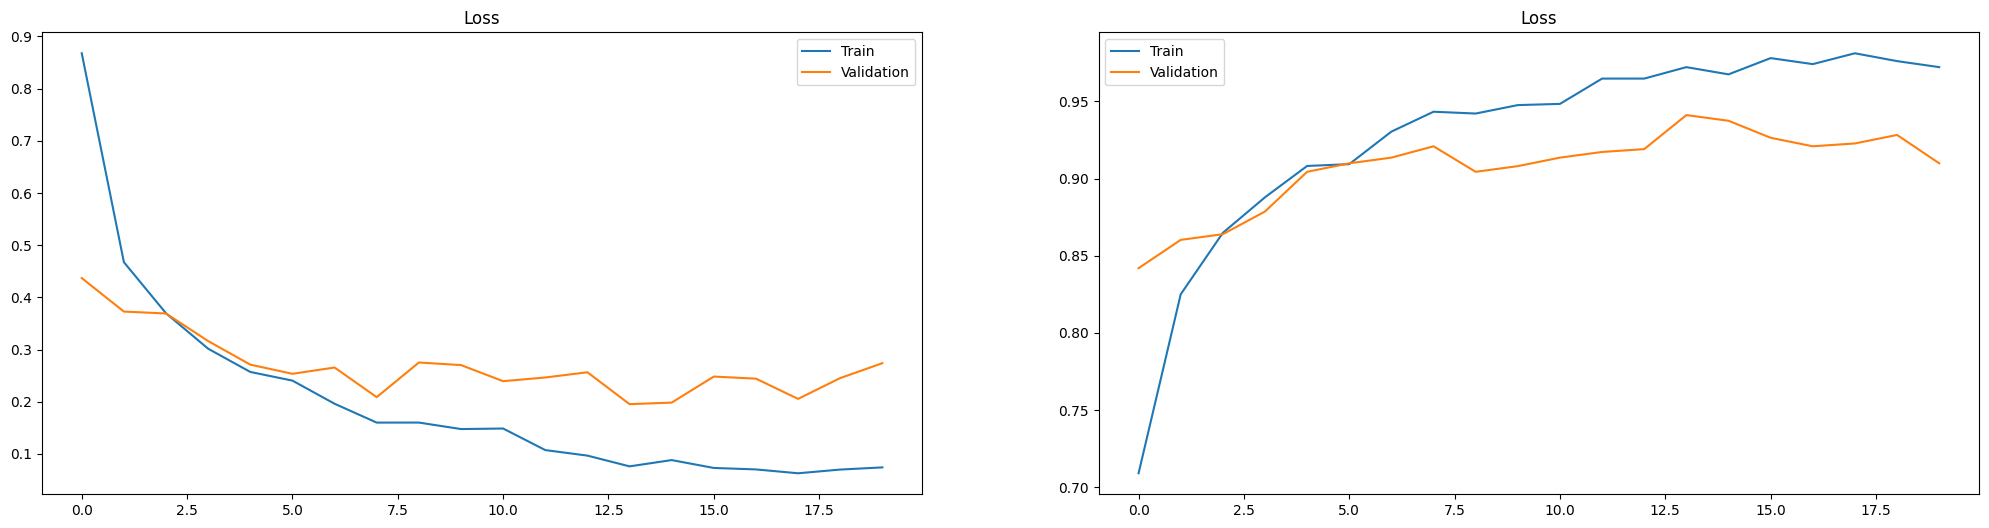

In [242]:
fig, ax = plt.subplots(nrows=1, ncols= 2, figsize=(25,6))

ax[0].plot(history_resNet.history['loss'], label='Train')
ax[0].plot(history_resNet.history['val_loss'], label='Validation')
ax[0].set_title('Loss')
ax[0].legend()

ax[1].plot(history_resNet.history['accuracy'], label='Train')
ax[1].plot(history_resNet.history['val_accuracy'], label='Validation')
ax[1].set_title('Loss')
ax[1].legend()

plt.show()

## Use Data Augmentation

In [ ]:
data_augmentation= keras.Sequential([
    keras.layers.RandomFlip("horizental"),
    keras.layers.RandomRotation(0.1),
    keras.layers.RandomZoom(0.1),
    keras.layers.RandomTranslation(0.1,0.1)
])

In [245]:
batch_size = 32
img_height = 180
img_width = 180

dataset = tf.keras.utils.image_dataset_from_directory(
    data_dir,
    image_size=(img_height, img_width),
    seed=123,
    batch_size=batch_size,
    shuffle=True
)

Found 3670 files belonging to 5 classes.


In [ ]:
# Apply augmentation to training dataset
# Allows TensorFlow to automatically tune the number of parallel calls and prefetch buffer size for best performance
AUTOTUNE = tf.data.AUTOTUNE

X_train = X_train.map(lambda x, y: (data_augmentation(x, training=True), y),
                      num_parallel_calls=AUTOTUNE)
X_train = X_train.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)

# Validation and test stay untouched
X_val = X_val.cache().prefetch(buffer_size=AUTOTUNE)
X_test = X_test.cache().prefetch(buffer_size=AUTOTUNE)

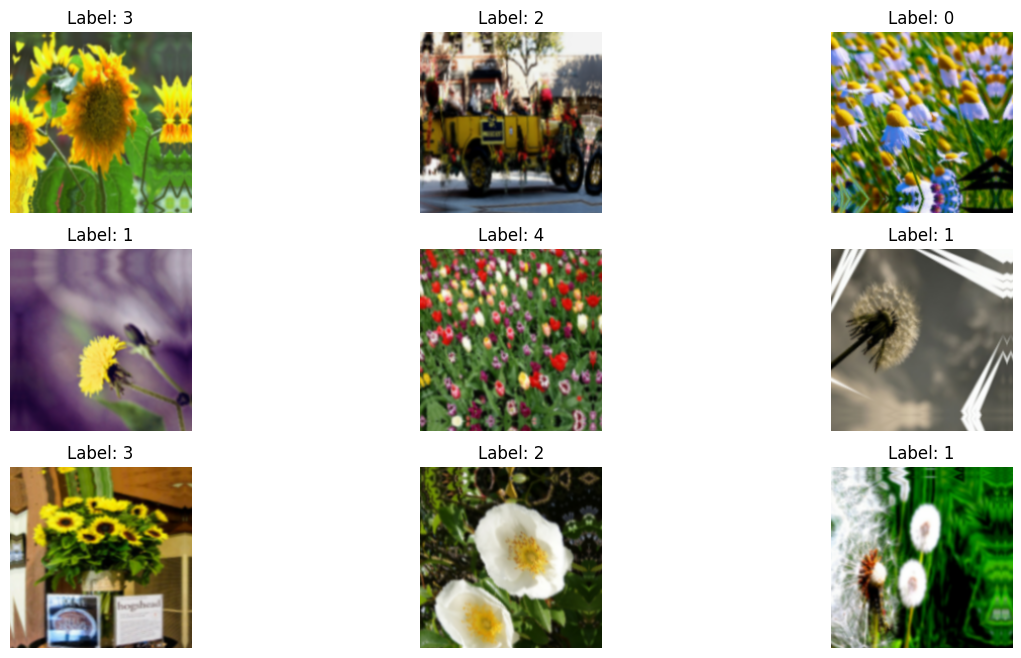

In [250]:
# Take one batch from training data
for images, labels in X_train.take(1):
    plt.figure(figsize=(15, 8))
    for i in range(9):
        image = images[i]
        augmented = data_augmentation(tf.expand_dims(image, 0))  # (1, 180, 180, 3)
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(tf.squeeze(augmented).numpy().astype("uint8"))
        plt.title(f"Label: {labels[i].numpy()}")
        plt.axis("off")
    break

In [251]:
# Write your code for training the models